In [1]:
import pandas as pd
df = pd.read_csv('weather.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature_c           10000 non-null  float64
 1   Humidity                10000 non-null  float64
 2   Wind_Speed_kmh          10000 non-null  float64
 3   Wind_Bearing_degrees    10000 non-null  int64  
 4   Visibility_km           10000 non-null  float64
 5   Pressure_millibars      10000 non-null  float64
 6   Rain                    10000 non-null  int64  
 7   Description             10000 non-null  object 
 8   Adjusted_Temperature_c  10000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 703.2+ KB


In [3]:
levels = len(pd.value_counts(df['Description']))

print('There are {} levels in the Description column'.format(levels))

There are 3 levels in the Description column


In [4]:
df_dummies = pd.get_dummies(df, drop_first=True)

print('There are {} columns in df_dummies' .format(df_dummies.shape[1]))

There are 10 columns in df_dummies


In [5]:
from sklearn.utils import shuffle

df_shuffled = shuffle(df_dummies, random_state=42)

In [6]:
DV = 'Temperature_c'

X = df_shuffled.drop(DV, axis=1)

y = df_shuffled[DV]



In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [9]:
model.fit(X_train[['Humidity']], y_train)

LinearRegression()

In [10]:
intercept = model.intercept_

In [11]:
coefficient = model.coef_

In [12]:
print('Temperature = {0:0.2f} + ({1:0.2f} x Humidity)'.format(intercept, coefficient[0]))

Temperature = 34.50 + (-30.69 x Humidity)


In [13]:
predictions = model.predict(X_test[['Humidity']])

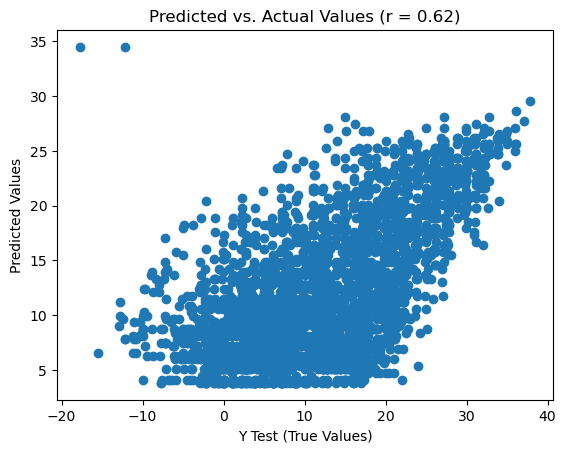

In [14]:
import matplotlib.pyplot as plt

from scipy.stats import pearsonr

plt.scatter(y_test, predictions)

plt.xlabel('Y Test (True Values)')

plt.ylabel('Predicted Values')

plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions)[0], 2))

plt.show()

C:\Users\Peter\.conda\envs\py33\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


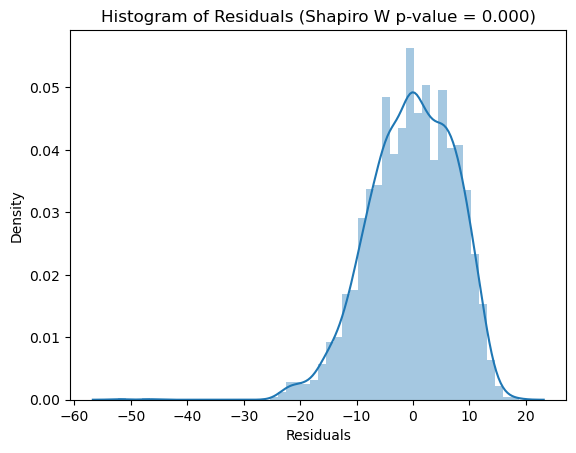

In [15]:
import seaborn as sns
from scipy.stats import shapiro

sns.distplot((y_test - predictions), bins = 50)

plt.xlabel('Residuals')

plt.ylabel('Density')

plt.title('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test - predictions)[1]))

plt.show()

In [16]:
from sklearn import metrics

import numpy as np

metrics_df = pd.DataFrame({'Metric': ['MAE',

                                      'MSE',

                                      'RMSE',

                                      'R-Squared'],

                          'Value': [metrics.mean_absolute_error(y_test, predictions),

                                    metrics.mean_squared_error(y_test, predictions),

                                    np.sqrt(metrics.mean_squared_error(y_test, predictions)),

                                    metrics.explained_variance_score(y_test, predictions)]}).round(3)

print(metrics_df)

      Metric   Value
0        MAE   6.052
1        MSE  56.187
2       RMSE   7.496
3  R-Squared   0.389
